In [1]:
from astropy.io import fits
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

pySPI imports:

In [3]:
from pyspi import SPIResponse

SPI Raw Data:

In [4]:
hdu_orbit = fits.open('sc_orbit_param.fits.gz')
hdu_oper = fits.open('spi_oper.fits.gz')

In [5]:
hdu_oper.info()

Filename: spi_oper.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   ()      
  1  SPI.-OSGL-ALL    1 BinTableHDU     91   2022045R x 6C   [1I, 1B, 1I, 4I, 1E, 1D]   
  2  SPI.-OPSD-ALL    1 BinTableHDU    107   475335R x 13C   [1I, 1B, 1I, 1B, 1I, 4I, 1B, 1B, 1B, 1E, 1E, 1B, 1D]   
  3  SPI.-OCRV-ALL    1 BinTableHDU    171   834R x 35C   [1I, 1B, 1I, 1B, 1I, 1I, 79I, 4I, 1B, 1B, 1B, 1E, 1B, 1B, 1B, 1B, 1B, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1B, 1B, 1B, 1E, 1E, 1E, 1B, 1D]   
  4  SPI.-OME2-ALL    1 BinTableHDU     95   298783R x 8C   [1I, 2B, 2I, 2B, 4I, 1B, 2E, 1D]   
  5  SPI.-OME3-ALL    1 BinTableHDU     95   56421R x 8C   [1I, 3B, 3I, 3B, 4I, 1B, 3E, 1D]   
  6  SPI.-OME4-ALL    1 BinTableHDU     95   9782R x 8C   [1I, 4B, 4I, 4B, 4I, 1B, 4E, 1D]   
  7  SPI.-OME5-ALL    1 BinTableHDU     95   1570R x 8C   [1I, 5B, 5I, 5B, 4I, 1B, 5E, 1D]   
  8  SPI.-OMEH-ALL    1 BinTableHDU     97   274R x 9C   [1I, 1B, 31B, 3

In [6]:
hdu_orbit[1].data.columns

ColDefs(
    name = 'OB_TIME'; format = '4I'; bscale = 1; bzero = 32768
    name = 'REVOL'; format = '1I'; bscale = 1; bzero = 32768
    name = 'REVOL_PHASE'; format = '1D'
    name = 'REVOL_FRAC'; format = '1D'
    name = 'DISTANCE'; format = '1D'; unit = 'km'
    name = 'XPOS'; format = '1D'; unit = 'km'
    name = 'YPOS'; format = '1D'; unit = 'km'
    name = 'ZPOS'; format = '1D'; unit = 'km'
    name = 'XVEL'; format = '1D'; unit = 'km/s'
    name = 'YVEL'; format = '1D'; unit = 'km/s'
    name = 'ZVEL'; format = '1D'; unit = 'km/s'
    name = 'RA_SCX'; format = '1D'; unit = 'deg'
    name = 'DEC_SCX'; format = '1D'; unit = 'deg'
    name = 'RA_SCZ'; format = '1D'; unit = 'deg'
    name = 'DEC_SCZ'; format = '1D'; unit = 'deg'
    name = 'POSANGLE'; format = '1D'; unit = 'deg'
)

In [7]:
hdu_oper[1].data.columns

ColDefs(
    name = 'TIME_TAG'; format = '1I'; bscale = 1; bzero = 32768
    name = 'DETE'; format = '1B'
    name = 'PHA'; format = '1I'; bscale = 1; bzero = 32768
    name = 'OB_TIME'; format = '4I'; bscale = 1; bzero = 32768
    name = 'ENERGY'; format = '1E'; unit = 'keV'
    name = 'TIME'; format = '1D'; unit = 'd'
)

In [13]:
energy_sgl = hdu_oper[1].data['energy']
energy_psd = hdu_oper[2].data['energy']
energy_me2 = hdu_oper[4].data['energy']
energy_me2 = energy_me2[0] + energy_me2[1]
energy_me3 = hdu_oper[5].data['energy']
energy_me3 = energy_me3[0] + energy_me3[1]
time_sgl = hdu_oper[1].data['time']
time_psd = hdu_oper[2].data['time']

<IPython.core.display.Javascript object>


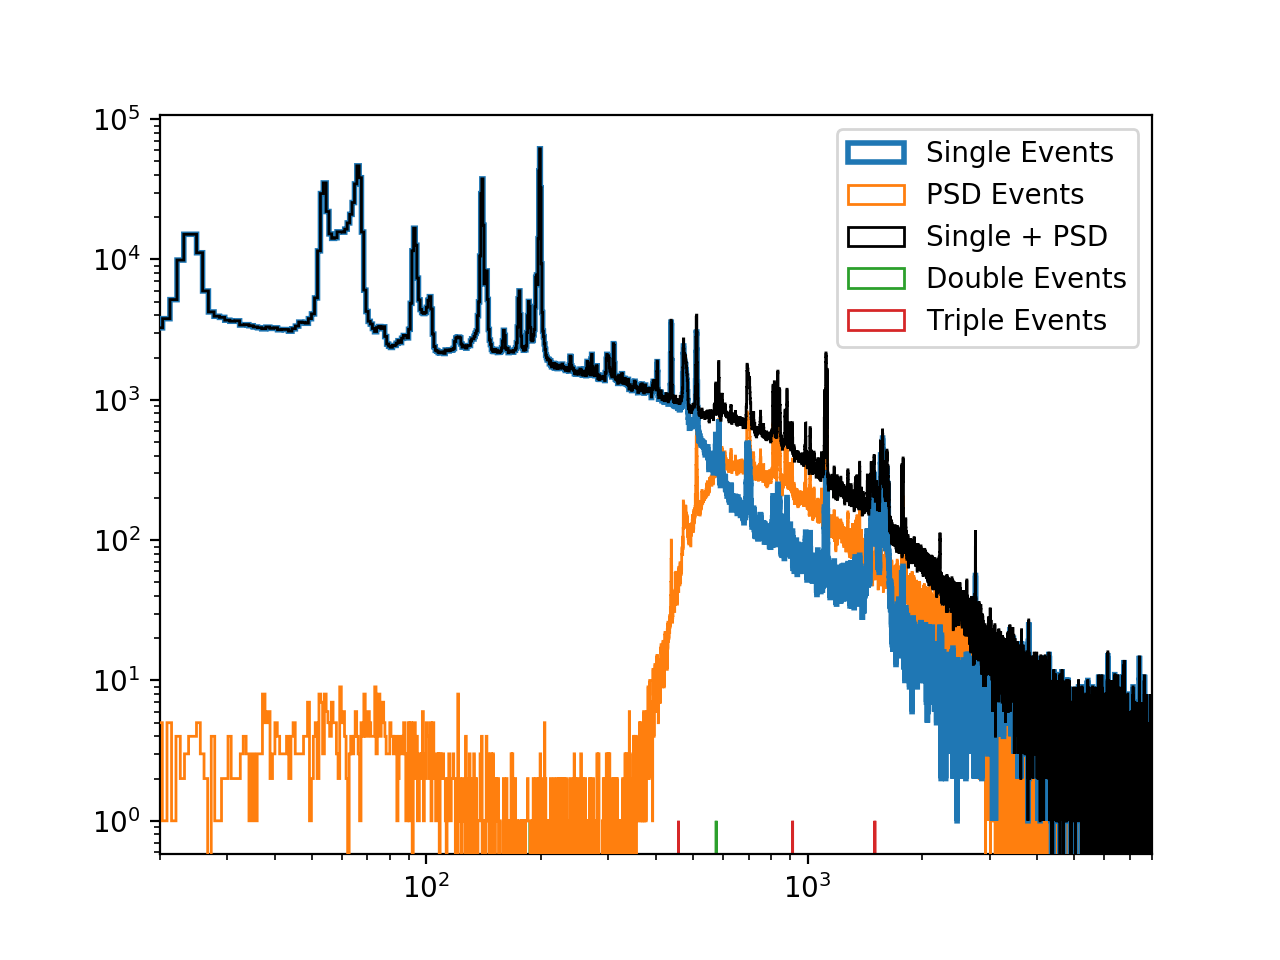

In [15]:
plt.hist(energy_sgl, bins=16000, histtype='step', label='Single Events', lw=2, zorder=999)
plt.hist(energy_psd, bins=16000, histtype='step', label='PSD Events', zorder=998)
plt.hist(np.append(energy_sgl, energy_psd), bins=16000, histtype='step', label='Single + PSD',
         color='black', zorder=1000)
plt.hist(energy_me2, bins=16000, histtype='step', label='Double Events')
plt.hist(energy_me3, bins=16000, histtype='step', label='Triple Events')

plt.yscale('log')
plt.xscale('log')
plt.xlim([20,8000])
plt.legend()

In [16]:
# Select energy range 20keV - 1 MeV and plot it vs. time (binned in 10s)

mask = (energy_sgl >= 20) & (energy_sgl <= 1000)

<IPython.core.display.Javascript object>


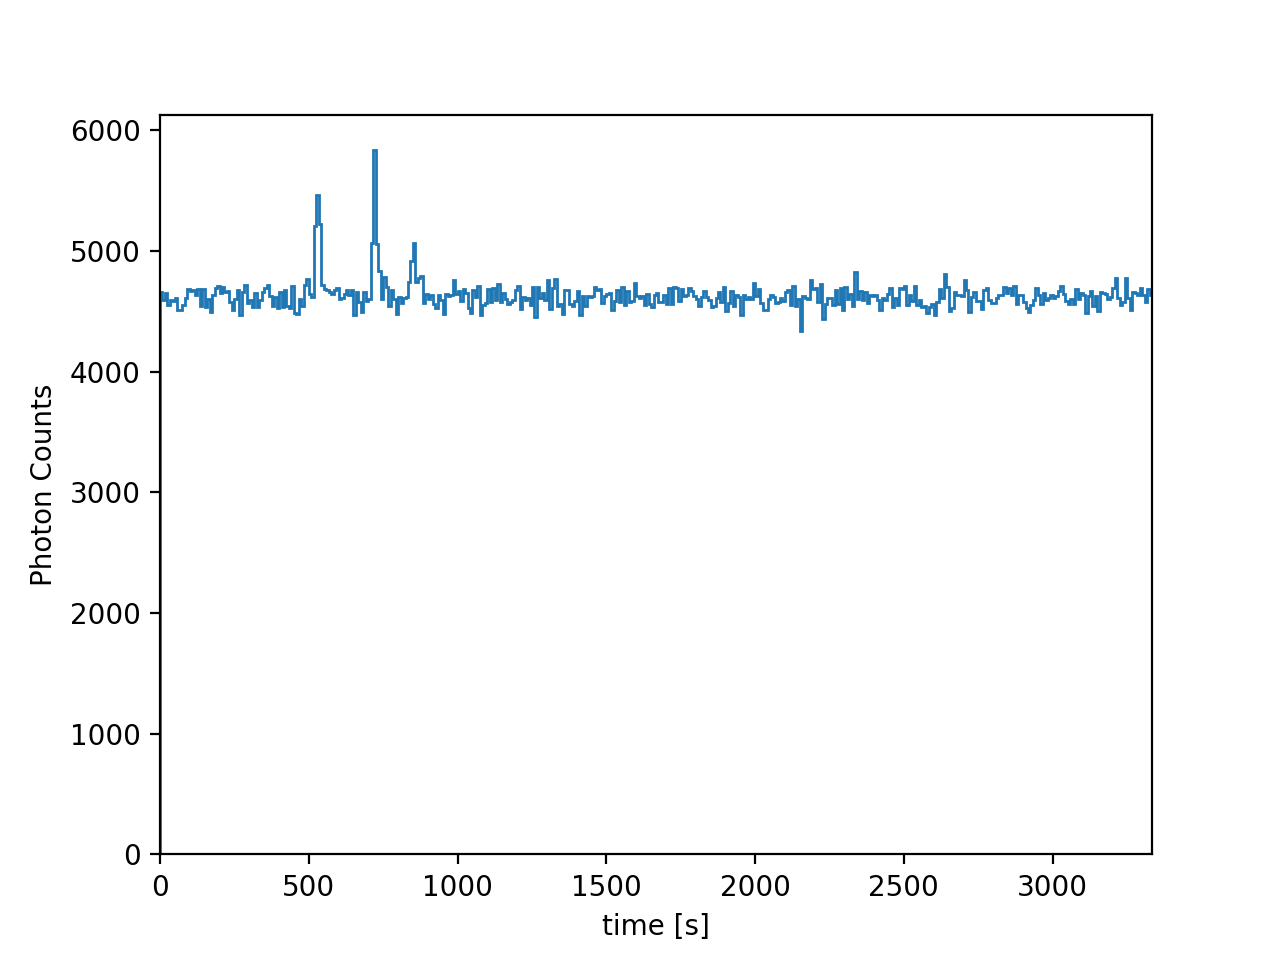

Text(0,0.5,'Photon Counts')

In [17]:
ee_sgl = energy_sgl[mask]
tt = time_sgl[mask]*24*60*60

plt.hist(tt - tt.min(), 400, histtype='step')
plt.xlim([0, (tt - tt.min()).max()])
plt.xlabel('time [s]')
plt.ylabel('Photon Counts')

<IPython.core.display.Javascript object>


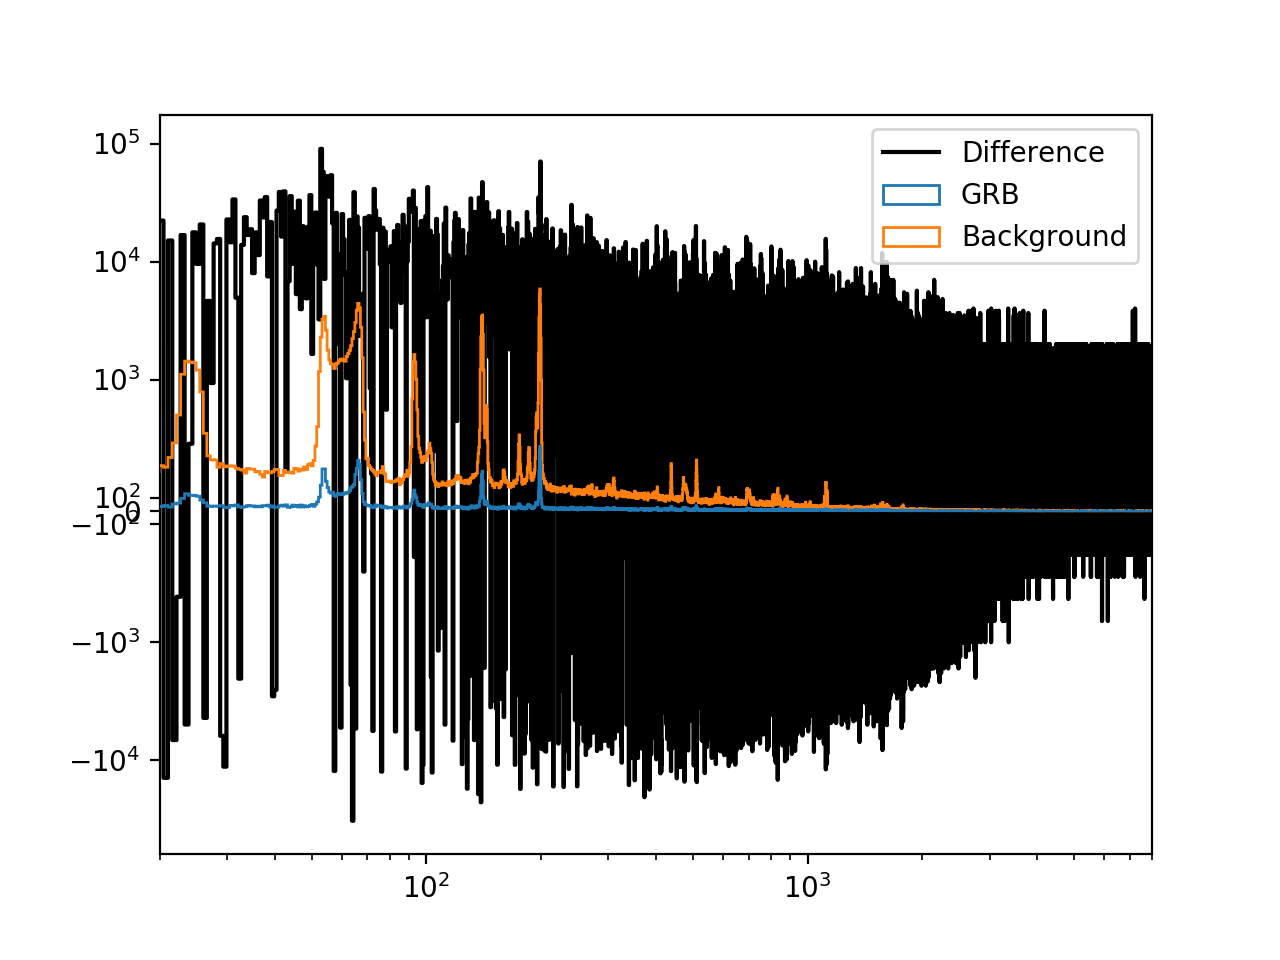

In [18]:
# build separate spectrum for GRB and background

grb_low = 4263.1115
grb_up = 4263.112

ee_sgl_grb = energy_sgl[(time_sgl >= grb_low) & (time_sgl <= grb_up)]
ee_psd_grb = energy_psd[(time_psd >= grb_low) & (time_psd <= grb_up)]
ee_sgl_bg = energy_sgl[time_sgl < grb_low]
ee_psd_bg = energy_psd[time_psd < grb_low]

len_grb = grb_up - grb_low
len_bg = grb_low - np.concatenate([time_sgl, time_psd]).min()

ee_grb = np.concatenate([ee_sgl_grb, ee_psd_grb])
ee_bg = np.concatenate([ee_sgl_bg, ee_psd_bg])

bins_grb = plt.hist(ee_grb, 16000, histtype='step', label='GRB', zorder=10)
bins_bg = plt.hist(ee_bg, bins=bins_grb[1], histtype='step', label='Background', zorder=9)
plt.step(bins_grb[1][:-1], (bins_grb[0]/len_grb - bins_bg[0]/len_bg), color='black',
        label='Difference') 
plt.yscale('symlog', linthreshy=1000)
plt.xscale('log')
plt.xlim([20,8000])
plt.legend()

In [19]:
len_bg

0.005936009787546936

In [22]:
# Plot IRFs for different angles
# Plot IRFs for different energies

hdu_irf_grp_0 = fits.open('testdata/rsp/spi_irf_grp_0021.fits')
hdu_irf_grp_1 = fits.open('testdata/rsp/spi_irf_grp_0022.fits')
hdu_irf_grp_2 = fits.open('testdata/rsp/spi_irf_grp_0023.fits')
hdu_irf_grp_3 = fits.open('testdata/rsp/spi_irf_grp_0024.fits')
hdu_irf_grp_4 = fits.open('testdata/rsp/spi_irf_grp_0026.fits')

hdu_irf_grp_3[1].data.columns


ColDefs(
    name = 'MEMBER_XTENSION'; format = '8A'
    name = 'MEMBER_NAME'; format = '32A'
    name = 'MEMBER_VERSION'; format = '1J'; null = 0
    name = 'MEMBER_POSITION'; format = '1J'; null = 0
    name = 'MEMBER_LOCATION'; format = '256A'
    name = 'MEMBER_URI_TYPE'; format = '3A'
)

In [29]:
rsp_hdus = [fits.open('testdata/rsp/{}'.format(i)) for i in hdu_irf_grp_3[2].data['member_location']]

<IPython.core.display.Javascript object>


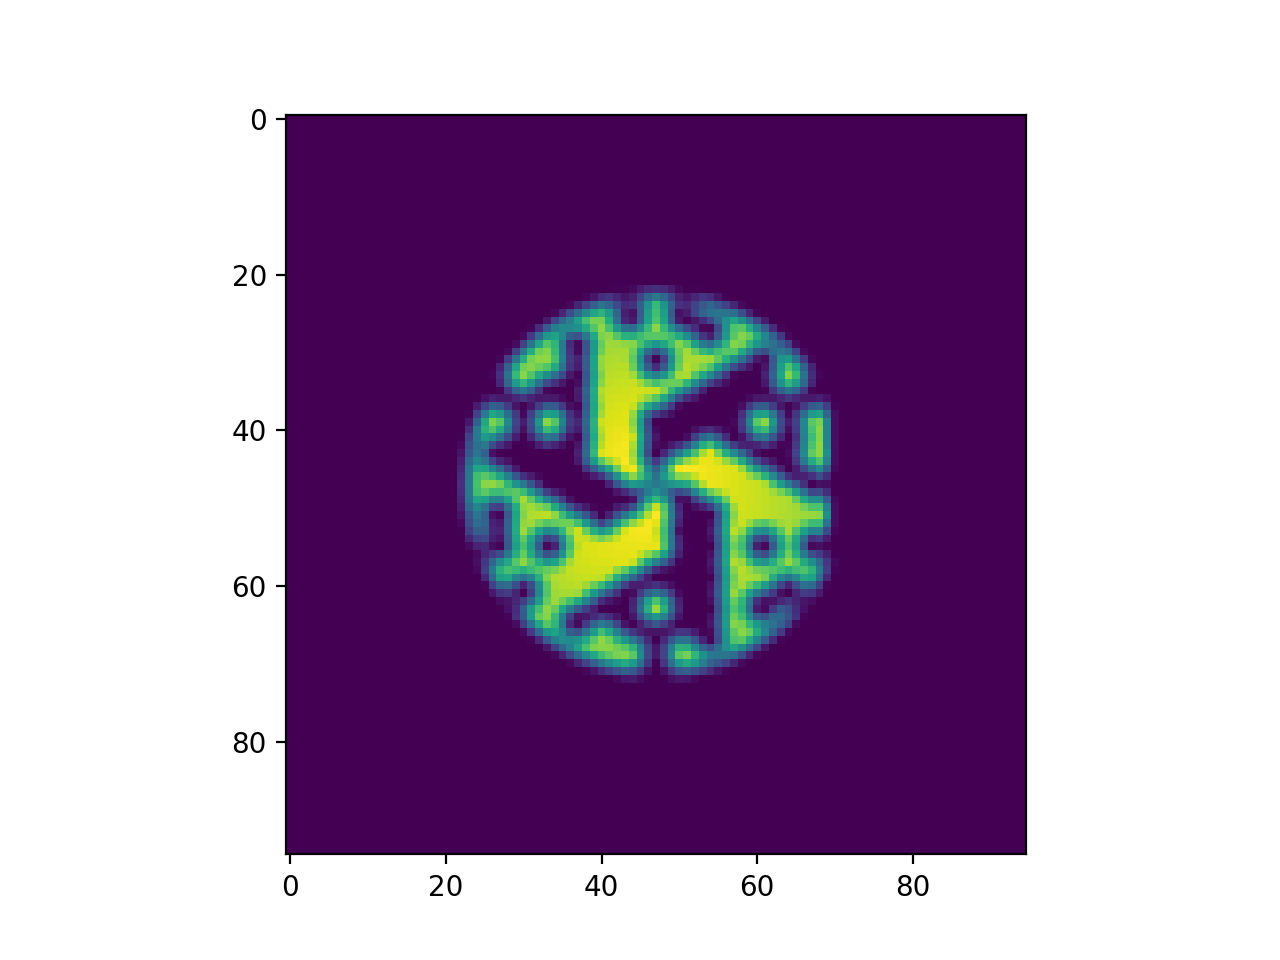

In [39]:
rsp_image = rsp_hdus[0][1].data[0].T[:19] # selecting the photo-peak extension

rsp_image.shape

plt.imshow(rsp_image[0])

In [45]:
hdu_irf_rsp_0589 = fits.open('testdata/rsp/spi_irf_rsp_0589.fits')

In [65]:
hdu_irf_rsp_0589[1].data.shape

(3, 95, 95, 85)

In [67]:
hdu_irf_rsp_0589[1].data[0]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [55]:
hdu_ebds = fits.open('testdata/rsp/spi_ebds_rsp_0001.fits')
hdu_ebds[1].data.columns

In [62]:
e_min = hdu_ebds[1].data['e_min']
e_max = hdu_ebds[1].data['e_max']

e_mean = (e_max - e_min)/2 + e_min

In [64]:
np.round(e_mean, 2)

array([  20.  ,   22.55,   25.45,   28.7 ,   32.35,   36.5 ,   41.15,
         46.35,   52.25,   58.9 ,   66.4 ,   74.85,   84.35,   95.1 ,
        107.25,  120.9 ,  136.25,  153.6 ,  173.2 ,  195.25,  220.1 ,
        248.15,  279.75,  315.35,  355.45,  400.7 ,  451.75,  509.25,
        574.05,  647.15,  729.55,  822.4 ,  927.1 , 1045.15, 1196.2 ,
       1328.2 , 1497.25, 1687.85, 1902.75, 2144.95, 2418.  , 2725.85,
       3072.85, 3464.  , 3905.  , 4402.15, 4962.55, 5594.3 , 6306.5 ,
       7109.35, 7767.4 ], dtype=float32)

In [ ]:
e_mean = 